Best hyperparameters: {'n_estimators': 100, 'max_depth': 5}
Random Forest accuracy on test set: 77.27%
Confusion Matrix:
[[90 12]
 [23 29]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.88      0.84       102
           1       0.71      0.56      0.62        52

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



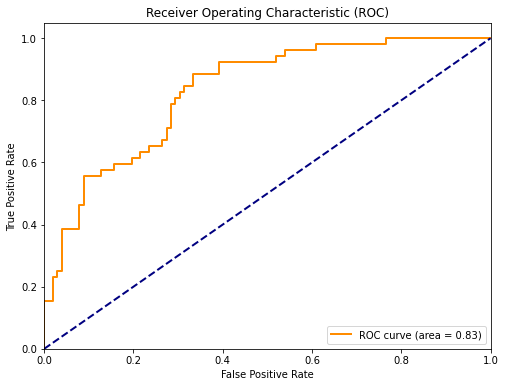

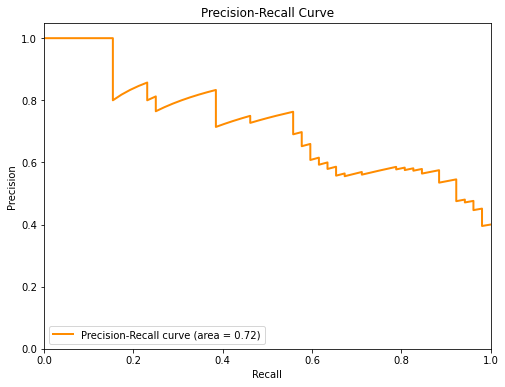

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc


data_path = r'C:\Users\nithin\Desktop\diabetes.csv'
data = pd.read_csv(data_path)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = [1 if label == 1 else -1 for label in y]

#Split data into training(60%), validation(20%), and test sets(20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


hyperparameters_list = [
    {'n_estimators': 50, 'max_depth': 5},
    {'n_estimators': 100, 'max_depth': 5},
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 10}
]

best_accuracy = 0
best_hyperparams = None
best_rf = None

for hyperparams in hyperparameters_list:
    rf = RandomForestClassifier(n_estimators=hyperparams['n_estimators'], 
                                max_depth=hyperparams['max_depth'], 
                                random_state=42)
    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparams = hyperparams
        best_rf = rf

print(f"Best hyperparameters: {best_hyperparams}")


y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Random Forest accuracy on test set: {test_accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


y_test_prob = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
pr_auc = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
